This dataset doesn't have gender information but therefore it contains data until 2000

In [13]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()

def load_special_edu_support_percentage():
    melted_df = loader.load('students_with_special_educational_support_no_gender')

    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    total_over_years = melted_df.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df



special_edu_support = load_special_edu_support_percentage()
x = loader.load('students_with_special_educational_support_no_gender')
x['total'] = pd.to_numeric(x['total'], errors='coerce')
#x = x.groupby('school')['total'].sum()
x

school
Evening schools and adult education colleges           0.0
Free Waldorf Schools                                9288.0
Grammar schools (8 years of schooling)             67653.0
Grammar schools (9 years of schooling)             30269.0
Integrated comprehensive schools                  602373.0
Intermediate schools                              112978.0
Orientation stages independent of school type     112433.0
Primary schools                                  1481717.0
Schools with various courses of education         310270.0
Secondary general schools                         386388.0
Special schools                                  8276405.0
__________                                             0.0
Name: total, dtype: float64

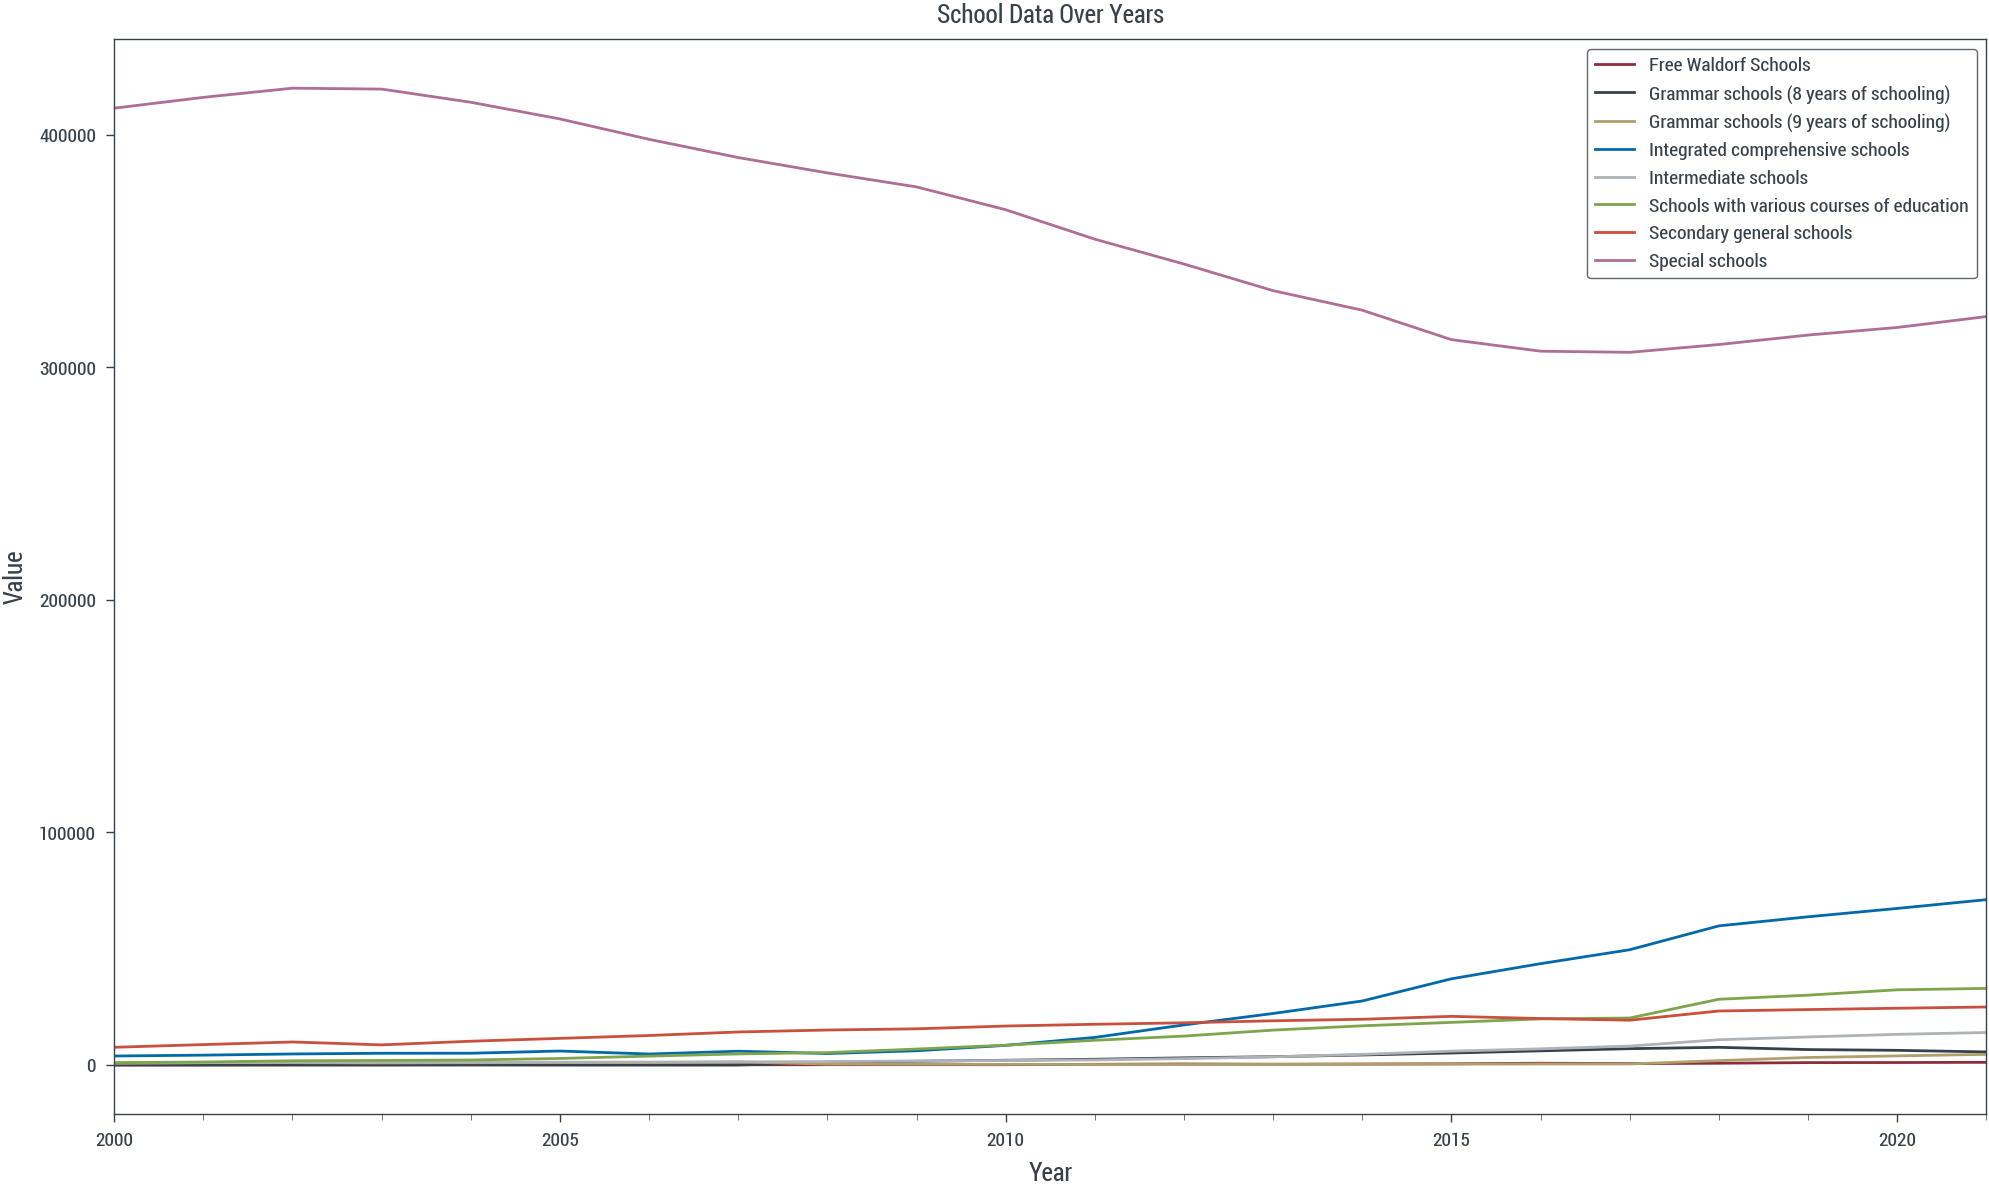

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for school in special_edu_support.index.get_level_values(1).unique():
    special_edu_support.xs(school, level='school')['edu_support_relative'].plot(ax=ax, label=school)

plt.title('School Data Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()